# **Common situations for Joining**

* when similar data is split and stored separately by 
  * time, 
  * location 
  * business units
  * or other factor

* when two or more datasets may have different but related factors

## Vertical Join





In [ ]:
import pandas as pd

# Create games_2016, games_2017 as in the exercises
games = pd.read_csv("games.csv")
games_2016, games_2017 = games[games["Season"]==2016], games[games["Season"]==2017]

print(games_2016.head(10))
print(games_2017.head(10))


   GameKey  Season SeasonType             HomeTeam             VisitTeam
0        1    2016        Pre   Indianapolis Colts     Green Bay Packers
1        2    2016        Pre     Los Angeles Rams        Dallas Cowboys
2        3    2016        Pre     Baltimore Ravens     Carolina Panthers
3        4    2016        Pre    Green Bay Packers      Cleveland Browns
4        5    2016        Pre        Chicago Bears        Denver Broncos
5        6    2016        Pre  Pittsburgh Steelers         Detroit Lions
6        7    2016        Pre  San Francisco 49ers        Houston Texans
7        8    2016        Pre        Buffalo Bills    Indianapolis Colts
8        9    2016        Pre        New York Jets  Jacksonville Jaguars
9       10    2016        Pre      New York Giants        Miami Dolphins
     GameKey  Season SeasonType            HomeTeam             VisitTeam
333      334    2017        Pre      Dallas Cowboys     Arizona Cardinals
334      335    2017        Pre   Arizona Cardina

The best way to combine the two  data frames is to combine the data row-wise similar to copying and pasting one table below another.

## Horizontal Join (VLOOKUP Style)

In [ ]:
import pandas as pd

# Create punts dataframe from text file
with open("punts.txt", "r") as f:
    temp = [line.split() for line in f]

punts = pd.DataFrame(data=temp, columns=["unused", 'GameKey', 'PlayId', 'GameClock', 'Quarter', 'PlayType', 'PossessionTeam']).drop("unused", axis=1)
print(punts.head(10), "\n")

games = pd.read_csv('games.csv')
print(games.head(10))


  GameKey PlayId GameClock Quarter PlayType PossessionTeam
0       2    191     12:30       1     Punt             LA
1       2   1132     12:08       2     Punt             LA
2       2   1227     10:01       2     Punt            DAL
3       2   1864      0:21       2     Punt             LA
4       2   2247     10:26       3     Punt            DAL
5       2   2342      9:00       3     Punt             LA
6       2   2805      0:27       3     Punt             LA
7       2   2970     13:30       4     Punt            DAL
8       2   3439      5:28       4     Punt            DAL
9       3    455      6:44       1     Punt            BLT 

   GameKey  Season SeasonType             HomeTeam             VisitTeam
0        1    2016        Pre   Indianapolis Colts     Green Bay Packers
1        2    2016        Pre     Los Angeles Rams        Dallas Cowboys
2        3    2016        Pre     Baltimore Ravens     Carolina Panthers
3        4    2016        Pre    Green Bay Packers      C

The best way to combine the two new data frames is to add data from games to the right of punts similar to using `a =VLOOKUP` formula in spreadsheets.

# **Concatenating rows with overlapping indices**

* `pd.concat([df1, df2, ...], ignore_index=True)`

# **Concatenating across columns**

* `pd.concat([df1, df2, ...], axis=1)`

# **Concatenating rows**

* Concatenate the data frames by consecutive season.
* Cross-tabulate `Season` and `SeasonType` with pd.crosstab().


In [ ]:
import pandas as pd

# Create games_2016, games_2017 as in the exercises
games = pd.read_csv("games.csv")
games_2016, games_2017 = games[games["Season"]==2016], games[games["Season"]==2017]

# Concatenate data frames
games = pd.concat([games_2016, games_2017])

# Cross-tabulate Season and Season Type
print(pd.crosstab(games.Season, games.SeasonType))

SeasonType  Post  Pre  Reg
Season                    
2016          12   65  256
2017          12   65  256


# **Concatenating rows with duplicated indexes**



In [ ]:
import pandas as pd

# Create games_2016, games_2017 as in the exercises
games = pd.read_csv("games.csv")
games_2016, games_2017 = games[games["Season"]==2016], games[games["Season"]==2017]

# Make repeated indexes on purpose
games_2017.reset_index(drop=True, inplace=True)

# View indexes
print(games_2016.index.values)
print(games_2017.index.values)

# Rejoin data frames
games = pd.concat([games_2016, games_2017], ignore_index=True)

# View new data frame
print(games)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

# **Concatenating columns**



In [ ]:
# หามาจาก stadium_names = list(set(stadiums["Stadium"]))
# turf_names = list(set(stadiums["Turf"]))
# แดมน์ ฟัค ชิท ไอ้คนสอน ทำไมมึงไม่อัพไฟล์ข้อมูลให้ครบ
import numpy as np

stadium_names = ['StubHub Center',  'Oakland-Alameda County Coliseum', 'FedExField', 'Lucas Oil', 'MetLife Stadium', 'Lincoln Financial Field', 'Paul Brown stadium', 'University of Phoenix Stadium', 'Gillette Stadium', 'Los Angeles Memorial Coliseum', 'Estadio Azteca', 'US Bank Stadium', 'Everbank Field', 'Mercedes-Benz Dome', 'CenturyLink Field', 'First Energy Stadium', 'Ford Field', 'Arrowhead Stadium', 'University of Phoenix', 'Bank of America Stadium ', 'NRG', 'Raymon James Stadium', 'Paul Brown Stadium', 'U.S. Bank Stadium', 'Bank of America', 'AT&T Stadium', 'EverBank Field', 'FirstEnergy Stadium', 'NRG Stadiium', 'Georgia Dome', 'Mercedes Benz-Superdome', 'Solidier Field', 'M&T Bank Stadium', 'FirstEnergy', 'Raymond James Stadium', 'Solider Field', 'Twickenham Stadium', 'Soldier Field', 'MetLife', 'Hard Rock Stadium', 'Wembley', 'Oakland Alameda County Coliseum', 'Los  Angeles Memorial Coliseum', 'New Era Field', 'Oakland Alameda-County Coliseum', 'AT&T', 'M & T Bank Stadium', 'Heinz Field', 'Nissan Stadium', 'Bank of America Stadium', 'Lambeau Field', 'Levis Stadium', 'Mercedes-Benz Stadium', 'M&T Stadium', 'Twickenham', 'NRG Stadium', 'University of Phoeinx Stadium', 'Tom Benson Hall of Fame Stadium', 'Mercedes-Benz Superdome', 'Lucas Oil Stadium', 'Camping World Stadium', 'Sports Authority Field at Mile High', 'Wembley Stadium', 'Qualcomm Stadium', 'Ralph Wilson Stadium', 'CenturyLink']
turf_names = [np.nan,'Natural Grass ',  'UBU Sports Speed S5-M', 'UBU Speed Series S5-M', 'Turf', 'Field Turf', 'DD GrassMaster', 'Field turf', 'Grass', 'Natural Grass', 'Naturall Grass', 'A-Turf Titan', 'Synthetic', 'FieldTurf360', 'grass', 'FieldTurf 360', 'FieldTurf', 'Natural grass', 'Natural', 'AstroTurf GameDay Grass 3D', 'Artifical', 'Artificial', 'Natrual Grass', 'UBU Speed Series-S5-M']
turf_wordcounts = [len(i.split()) for i in turf_names if i is not np.nan]
max_num = max(turf_wordcounts)
max_num
# หา max_num เพื่อนับย้อนจากหลังสุดมา

4

In [ ]:
import pandas as pd

temp = []
# Create stadiums dataframe from text file
with open("stadiums.txt", "r") as f:
    for line in f:
        lines = line.split()
        # ดูว่าแต่ละตัวที่ถูก split ไป เมื่อนำกลับมา join กันแล้ว ทั้งสองคอลัมน์นี้มีชื่ออยู่ใน set ของชื่อ stadium และชื่อ turf หรือไม่
        # ถ้ามีทั้งสองตัว ก็ใส่ไป ถ้าไม่มี ย้อนลูปกลับไปทำใหม่ ขยับ index ไป
        for i in range(1, max_num+1): # ต้องบวก 1 เพราะไม่รวมตัวสุดท้าย
            # lines[1:-i] ไม่รวมตัวสุดท้าย
            if (" ".join(lines[1:-i]) in stadium_names ) & (" ".join(lines[-i:]) in turf_names):
                temp.append([lines[0], " ".join(lines[1:-i]), " ".join(lines[-i:]) ])

stadiums = pd.DataFrame(data=temp, columns=['GameKey', "Stadium", "Turf"])
stadiums.set_index("GameKey", inplace=True)
stadiums.index = stadiums.index.astype(int) # เพราะว่า index ของ stadiums จากกระบวนการนี้เป็น string
games = pd.read_csv("games.csv")
games.set_index("GameKey", inplace=True)

# View data frames
print(games.head())
print(stadiums.head())

# Join data frames
games_places = pd.concat([games, stadiums], axis=1)

# Cross-tabulate Season and Season Type
print(pd.crosstab(games_places.Turf, games_places.SeasonType))

         Season SeasonType            HomeTeam          VisitTeam
GameKey                                                          
1          2016        Pre  Indianapolis Colts  Green Bay Packers
2          2016        Pre    Los Angeles Rams     Dallas Cowboys
3          2016        Pre    Baltimore Ravens  Carolina Panthers
4          2016        Pre   Green Bay Packers   Cleveland Browns
5          2016        Pre       Chicago Bears     Denver Broncos
                                 Stadium            Turf
GameKey                                                 
1        Tom Benson Hall of Fame Stadium            Turf
2          Los Angeles Memorial Coliseum           Grass
3                       M&T Bank Stadium   Natural Grass
4                          Lambeau Field  DD GrassMaster
5                          Soldier Field           Grass
SeasonType                  Post  Pre  Reg
Turf                                      
A-Turf Titan                   0    4   16
Artifical 

In [ ]:
import pandas as pd

# Create punts dataframe from text file
with open("punts.txt", "r") as f:
    temp = [line.split() for line in f]

punts = pd.DataFrame(data=temp, columns=["unused", 'GameKey', 'PlayId', 'GameClock', 'Quarter', 'PlayType', 'PossessionTeam']).drop("unused", axis=1)
punts["GameKey"] = punts["GameKey"].astype(int)
punts["PlayId"] = punts["PlayId"].astype(int)
coords = pd.read_csv("ngs.csv")
# View punts 
print(punts.head(10))

# View coords
print(coords.head(10))

# # # Merge data frames
# punts_w_coords = punts.merge(coords)

# # View new data frame
# print(punts_w_coords.head(15))


   GameKey  PlayId GameClock Quarter PlayType PossessionTeam
0        2     191     12:30       1     Punt             LA
1        2    1132     12:08       2     Punt             LA
2        2    1227     10:01       2     Punt            DAL
3        2    1864      0:21       2     Punt             LA
4        2    2247     10:26       3     Punt            DAL
5        2    2342      9:00       3     Punt             LA
6        2    2805      0:27       3     Punt             LA
7        2    2970     13:30       4     Punt            DAL
8        2    3439      5:28       4     Punt            DAL
9        3     455      6:44       1     Punt            BLT
   GameKey  PlayId  GSISID        Time      x      y       o
0      402    1314   30694  17:55:16.0  49.11  54.22   30.97
1      402    1314   32054  17:55:17.1  50.79  54.20  286.10
2      402    1314   26158  17:55:17.1  49.45  54.09  299.60
3      402    1314   26995  17:55:17.2  52.75  54.25  217.80
4      402    1314   320

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
punts["PlayId"].dtype

dtype('O')

In [ ]:
punts["GameKey"] = punts["GameKey"].astype(int)
punts["GameKey"].dtype

dtype('int64')

# **One-to-one Join**

*  The lookup column of each table is the same for both tables.
*  Datasets at the same level

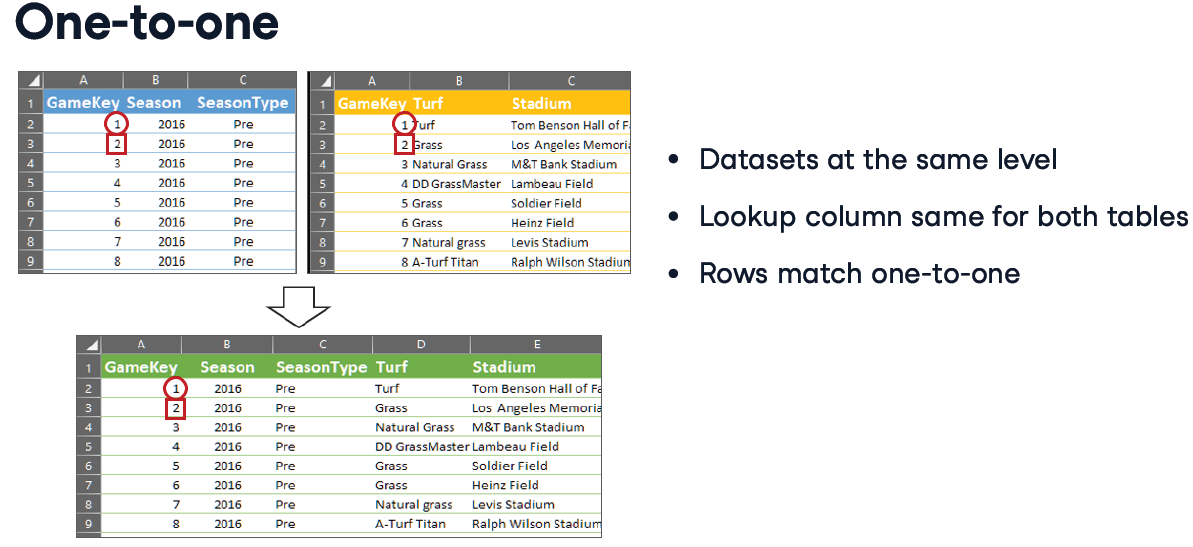




In [ ]:
import pandas as pd
import numpy as np

stadium_names = ['StubHub Center',  'Oakland-Alameda County Coliseum', 'FedExField', 'Lucas Oil', 'MetLife Stadium', 'Lincoln Financial Field', 'Paul Brown stadium', 'University of Phoenix Stadium', 'Gillette Stadium', 'Los Angeles Memorial Coliseum', 'Estadio Azteca', 'US Bank Stadium', 'Everbank Field', 'Mercedes-Benz Dome', 'CenturyLink Field', 'First Energy Stadium', 'Ford Field', 'Arrowhead Stadium', 'University of Phoenix', 'Bank of America Stadium ', 'NRG', 'Raymon James Stadium', 'Paul Brown Stadium', 'U.S. Bank Stadium', 'Bank of America', 'AT&T Stadium', 'EverBank Field', 'FirstEnergy Stadium', 'NRG Stadiium', 'Georgia Dome', 'Mercedes Benz-Superdome', 'Solidier Field', 'M&T Bank Stadium', 'FirstEnergy', 'Raymond James Stadium', 'Solider Field', 'Twickenham Stadium', 'Soldier Field', 'MetLife', 'Hard Rock Stadium', 'Wembley', 'Oakland Alameda County Coliseum', 'Los  Angeles Memorial Coliseum', 'New Era Field', 'Oakland Alameda-County Coliseum', 'AT&T', 'M & T Bank Stadium', 'Heinz Field', 'Nissan Stadium', 'Bank of America Stadium', 'Lambeau Field', 'Levis Stadium', 'Mercedes-Benz Stadium', 'M&T Stadium', 'Twickenham', 'NRG Stadium', 'University of Phoeinx Stadium', 'Tom Benson Hall of Fame Stadium', 'Mercedes-Benz Superdome', 'Lucas Oil Stadium', 'Camping World Stadium', 'Sports Authority Field at Mile High', 'Wembley Stadium', 'Qualcomm Stadium', 'Ralph Wilson Stadium', 'CenturyLink']
turf_names = [np.nan,'Natural Grass ',  'UBU Sports Speed S5-M', 'UBU Speed Series S5-M', 'Turf', 'Field Turf', 'DD GrassMaster', 'Field turf', 'Grass', 'Natural Grass', 'Naturall Grass', 'A-Turf Titan', 'Synthetic', 'FieldTurf360', 'grass', 'FieldTurf 360', 'FieldTurf', 'Natural grass', 'Natural', 'AstroTurf GameDay Grass 3D', 'Artifical', 'Artificial', 'Natrual Grass', 'UBU Speed Series-S5-M']
turf_wordcounts = [len(i.split()) for i in turf_names if i is not np.nan]
max_num = max(turf_wordcounts)

temp = []
# Create stadiums dataframe from text file
with open("stadiums.txt", "r") as f:
    for line in f:
        lines = line.split()
        # ดูว่าแต่ละตัวที่ถูก split ไป เมื่อนำกลับมา join กันแล้ว ทั้งสองคอลัมน์นี้มีชื่ออยู่ใน set ของชื่อ stadium และชื่อ turf หรือไม่
        # ถ้ามีทั้งสองตัว ก็ใส่ไป ถ้าไม่มี ย้อนลูปกลับไปทำใหม่ ขยับ index ไป
        for i in range(1, max_num+1): # ต้องบวก 1 เพราะไม่รวมตัวสุดท้าย
            # lines[1:-i] ไม่รวมตัวสุดท้าย
            if (" ".join(lines[1:-i]) in stadium_names ) & (" ".join(lines[-i:]) in turf_names):
                temp.append([lines[0], " ".join(lines[1:-i]), " ".join(lines[-i:]) ])

stadiums = pd.DataFrame(data=temp, columns=['GameKey', "Stadium", "Turf"])
stadiums.index = stadiums.index.astype(int) # เพราะว่า index ของ stadiums จากกระบวนการนี้เป็น string
games = pd.read_csv("games.csv")

display(stadiums.head())
display(games.head())
print("\nThese two tables can be joined with 1-1 on GameKey column.")


,GameKey,Stadium,Turf
0,1,Tom Benson Hall of Fame Stadium,Turf
1,2,Los Angeles Memorial Coliseum,Grass
2,3,M&T Bank Stadium,Natural Grass
3,4,Lambeau Field,DD GrassMaster
4,5,Soldier Field,Grass


,GameKey,Season,SeasonType,HomeTeam,VisitTeam
0,1,2016,Pre,Indianapolis Colts,Green Bay Packers
1,2,2016,Pre,Los Angeles Rams,Dallas Cowboys
2,3,2016,Pre,Baltimore Ravens,Carolina Panthers
3,4,2016,Pre,Green Bay Packers,Cleveland Browns
4,5,2016,Pre,Chicago Bears,Denver Broncos



These two tables can be joined with 1-1 on GameKey column.


# **One to Many**

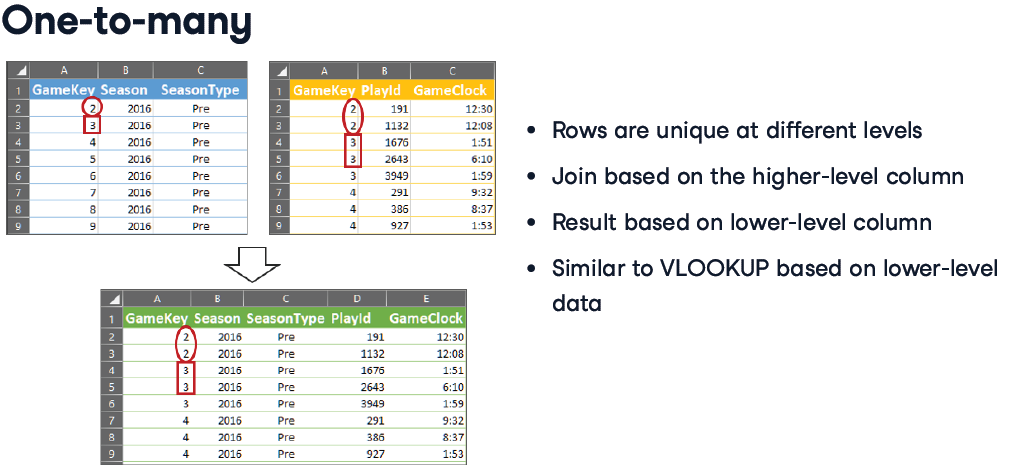

In [ ]:
import pandas as pd
import numpy as np

stadium_names = ['StubHub Center',  'Oakland-Alameda County Coliseum', 'FedExField', 'Lucas Oil', 'MetLife Stadium', 'Lincoln Financial Field', 'Paul Brown stadium', 'University of Phoenix Stadium', 'Gillette Stadium', 'Los Angeles Memorial Coliseum', 'Estadio Azteca', 'US Bank Stadium', 'Everbank Field', 'Mercedes-Benz Dome', 'CenturyLink Field', 'First Energy Stadium', 'Ford Field', 'Arrowhead Stadium', 'University of Phoenix', 'Bank of America Stadium ', 'NRG', 'Raymon James Stadium', 'Paul Brown Stadium', 'U.S. Bank Stadium', 'Bank of America', 'AT&T Stadium', 'EverBank Field', 'FirstEnergy Stadium', 'NRG Stadiium', 'Georgia Dome', 'Mercedes Benz-Superdome', 'Solidier Field', 'M&T Bank Stadium', 'FirstEnergy', 'Raymond James Stadium', 'Solider Field', 'Twickenham Stadium', 'Soldier Field', 'MetLife', 'Hard Rock Stadium', 'Wembley', 'Oakland Alameda County Coliseum', 'Los  Angeles Memorial Coliseum', 'New Era Field', 'Oakland Alameda-County Coliseum', 'AT&T', 'M & T Bank Stadium', 'Heinz Field', 'Nissan Stadium', 'Bank of America Stadium', 'Lambeau Field', 'Levis Stadium', 'Mercedes-Benz Stadium', 'M&T Stadium', 'Twickenham', 'NRG Stadium', 'University of Phoeinx Stadium', 'Tom Benson Hall of Fame Stadium', 'Mercedes-Benz Superdome', 'Lucas Oil Stadium', 'Camping World Stadium', 'Sports Authority Field at Mile High', 'Wembley Stadium', 'Qualcomm Stadium', 'Ralph Wilson Stadium', 'CenturyLink']
turf_names = [np.nan,'Natural Grass ',  'UBU Sports Speed S5-M', 'UBU Speed Series S5-M', 'Turf', 'Field Turf', 'DD GrassMaster', 'Field turf', 'Grass', 'Natural Grass', 'Naturall Grass', 'A-Turf Titan', 'Synthetic', 'FieldTurf360', 'grass', 'FieldTurf 360', 'FieldTurf', 'Natural grass', 'Natural', 'AstroTurf GameDay Grass 3D', 'Artifical', 'Artificial', 'Natrual Grass', 'UBU Speed Series-S5-M']
turf_wordcounts = [len(i.split()) for i in turf_names if i is not np.nan]
max_num = max(turf_wordcounts)

temp = []
# Create stadiums dataframe from text file
with open("stadiums.txt", "r") as f:
    for line in f:
        lines = line.split()
        # ดูว่าแต่ละตัวที่ถูก split ไป เมื่อนำกลับมา join กันแล้ว ทั้งสองคอลัมน์นี้มีชื่ออยู่ใน set ของชื่อ stadium และชื่อ turf หรือไม่
        # ถ้ามีทั้งสองตัว ก็ใส่ไป ถ้าไม่มี ย้อนลูปกลับไปทำใหม่ ขยับ index ไป
        for i in range(1, max_num+1): # ต้องบวก 1 เพราะไม่รวมตัวสุดท้าย
            # lines[1:-i] ไม่รวมตัวสุดท้าย
            if (" ".join(lines[1:-i]) in stadium_names ) & (" ".join(lines[-i:]) in turf_names):
                temp.append([lines[0], " ".join(lines[1:-i]), " ".join(lines[-i:]) ])

stadiums = pd.DataFrame(data=temp, columns=['GameKey', "Stadium", "Turf"])
stadiums.index = stadiums.index.astype(int) # เพราะว่า index ของ stadiums จากกระบวนการนี้เป็น string

with open("punts.txt", "r") as f:
    temp = [line.split() for line in f]

punts = pd.DataFrame(data=temp, columns=["unused", 'GameKey', 'PlayId', 'GameClock', 'Quarter', 'PlayType', 'PossessionTeam']).drop("unused", axis=1)
punts["GameKey"] = punts["GameKey"].astype(int)
punts["PlayId"] = punts["PlayId"].astype(int)

display(stadiums.head())
display(punts.head(15))
print("\nThis can be joined using one to many join.  The new data frame will have a separate play on each row.")


,GameKey,Stadium,Turf
0,1,Tom Benson Hall of Fame Stadium,Turf
1,2,Los Angeles Memorial Coliseum,Grass
2,3,M&T Bank Stadium,Natural Grass
3,4,Lambeau Field,DD GrassMaster
4,5,Soldier Field,Grass


,GameKey,PlayId,GameClock,Quarter,PlayType,PossessionTeam
0,2,191,12:30,1,Punt,LA
1,2,1132,12:08,2,Punt,LA
2,2,1227,10:01,2,Punt,DAL
3,2,1864,0:21,2,Punt,LA
4,2,2247,10:26,3,Punt,DAL
5,2,2342,9:00,3,Punt,LA
6,2,2805,0:27,3,Punt,LA
7,2,2970,13:30,4,Punt,DAL
8,2,3439,5:28,4,Punt,DAL
9,3,455,6:44,1,Punt,BLT



This can be joined using one to many join.  The new data frame will have a separate play on each row.


# **Many to Many**

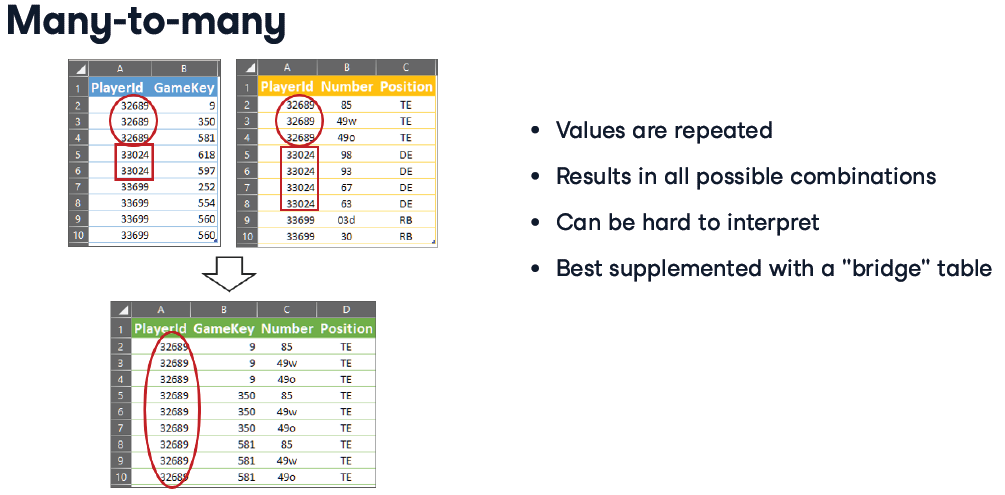

# **Left JOIN**

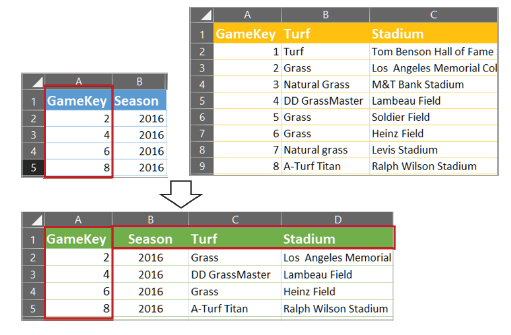

# **Right-JOIN**

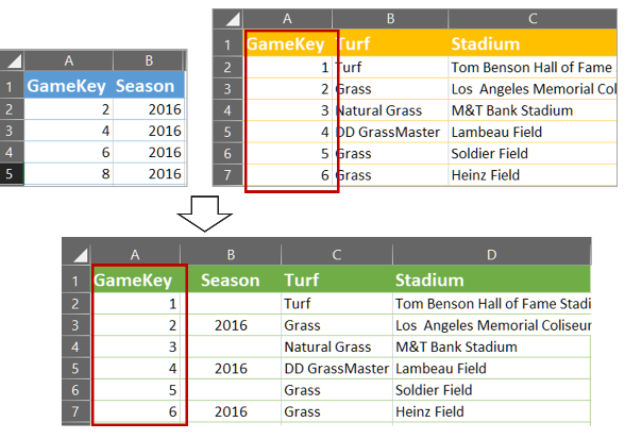

# **Joining one two keys**

* Keys are not unique, but ...
* The combination of two keys is unique.
* The argument for `on=` keyword argument is `["key1", "key2"]`.

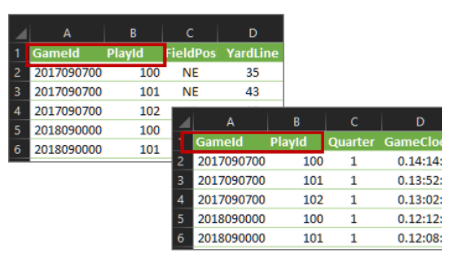

# **Replicating VLOOKUP**

* Merge the data frames with a left join and view the first 5 rows of the result.
* Merge the data frames with a right join and view the first 5 rows of the result.

*Be careful, in Pandas 1.1.5 `how="right"` is not similar to `how="right" `in 0.24.0.  To replicate DataCamp result, `how="inner"` is used instead.*

In [ ]:
import pandas as pd
import numpy as np

# เตรียมตาราง thursday

game_site = ['Arlington',  'Atlanta', 'Baltimore', 'Canton', 'Charlotte', 'Chicago', 'Cincinnati', 'Cleveland', 'Denver', 'Detroit','East Rutherford', 'Foxborough', 'Glendale', 'Green Bay', 'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Landover', 'Miami Gardens', 'Minneapolis', 'Nashville', 'New Orleans', 'Oakland', 'Orchard Park', 'Orlando', 'Philadelphia', 'Pittsburgh', 'San Diego', 'Santa Clara', 'Seattle', 'Tampa Bay']
max_num = max([len(i.split()) for i in game_site if i is not np.nan])
temp = []
with open("Thursday.txt", "r") as f:
    for line in f:
        lines = line.split()
        # ดูว่าแต่ละตัวที่ถูก split ไป เมื่อนำกลับมา join กันแล้ว ทั้งสองคอลัมน์นี้มีชื่ออยู่ใน set ของชื่อ stadium และชื่อ turf หรือไม่
        # ถ้ามีทั้งสองตัว ก็ใส่ไป ถ้าไม่มี ย้อนลูปกลับไปทำใหม่ ขยับ index ไป
        for i in range(1, max_num+1): # ต้องบวก 1 เพราะไม่รวมตัวสุดท้าย
            # lines[1:-i] ไม่รวมตัวสุดท้าย
            if " ".join(lines[-i:]) in game_site:
                temp.append([lines[1:-i],  " ".join(lines[-i:]) ])

df = pd.DataFrame(data=temp) #, columns=['GameKey', "Season_Year",  "Week",   "Game_Date",  "Game_Day", "Game_Site"])
thursdays = pd.DataFrame(df[0].to_list())
thursdays[5] = df[1]
thursdays.columns = ['GameKey', "Season_Year",  "Week",   "Game_Date",  "Game_Day", "Game_Site"]
thursdays["GameKey"], thursdays["Season_Year"], thursdays["Week"] = thursdays["GameKey"].astype(int), thursdays["Season_Year"].astype(int), thursdays["Week"].astype(int)

impacts = pd.read_csv("impacts.csv")
impacts.drop("Unnamed: 0", axis=1, inplace=True)

display(thursdays.head())
display(impacts.head())
# Merge data frames and view
thursday_impacts = pd.merge(thursdays, impacts, on='GameKey', how='left')
display(thursday_impacts.head())
# Merge data frames and view

# Be careful, in Pandas 1.1.5 how="right" is not similar to how="right" in 0.24.0
all_impacts = pd.merge(impacts, thursdays, on="GameKey", how="inner")
display(all_impacts.head())




,GameKey,Season_Year,Week,Game_Date,Game_Day,Game_Site
0,3,2016,2,8/11/2016,Thursday,Baltimore
1,5,2016,2,8/11/2016,Thursday,Chicago
2,9,2016,2,8/11/2016,Thursday,East Rutherford
3,12,2016,2,8/11/2016,Thursday,Foxborough
4,16,2016,2,8/11/2016,Thursday,Philadelphia


,GameKey,PlayID,Primary_Impact_Type
0,5,3129,Helmet-to-body
1,21,2587,Helmet-to-helmet
2,29,538,Helmet-to-body
3,45,1212,Helmet-to-body
4,54,1045,Helmet-to-body


,GameKey,Season_Year,Week,Game_Date,Game_Day,Game_Site,PlayID,Primary_Impact_Type
0,3,2016,2,8/11/2016,Thursday,Baltimore,NaN,NaN
1,5,2016,2,8/11/2016,Thursday,Chicago,3129.0,Helmet-to-body
2,9,2016,2,8/11/2016,Thursday,East Rutherford,NaN,NaN
3,12,2016,2,8/11/2016,Thursday,Foxborough,NaN,NaN
4,16,2016,2,8/11/2016,Thursday,Philadelphia,NaN,NaN


,GameKey,PlayID,Primary_Impact_Type,Season_Year,Week,Game_Date,Game_Day,Game_Site
0,5,3129,Helmet-to-body,2016,2,8/11/2016,Thursday,Chicago
1,54,1045,Helmet-to-body,2016,5,9/1/2016,Thursday,Charlotte
2,60,905,Helmet-to-helmet,2016,5,9/1/2016,Thursday,Detroit
3,274,3609,Helmet-to-helmet,2016,15,12/15/2016,Thursday,Seattle
4,357,3630,Helmet-to-body,2017,3,8/17/2017,Thursday,Miami Gardens


# **Merging on two or more keys**

* Merge the data frames using the appropriate key column(s).
* Check for duplicated key values using the `.duplicated()` and `.sum() `methods.

In [ ]:
import pandas as pd

play_times = pd.read_csv("play_times.csv")
play_yards = pd.read_csv("play_yards.csv")
play_times.drop("Unnamed: 0", axis=1, inplace=True)
play_yards.drop("Unnamed: 0", axis=1, inplace=True)

# Merge data frames
plays = pd.merge(play_times, play_yards, on=["GameId",  "PlayId"])

# Check for duplicated values in key columns
plays.duplicated(['GameId', 'PlayId']).sum()


0

# **INNER JOIN**

* Use when it's desirable to avoid missing data in the combined data frame.

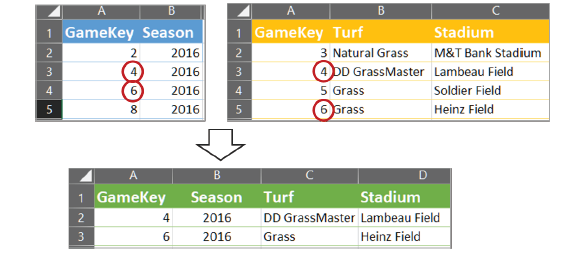

# **JOIN ON DIFFERENT NAMES**

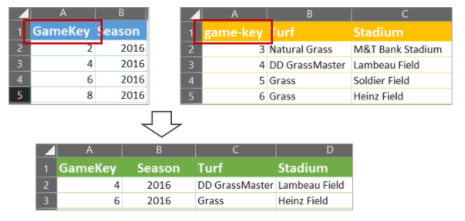

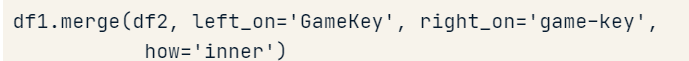

In [ ]:
import pandas as pd
import numpy as np

# เตรียมตาราง thursday

game_site = ['Arlington',  'Atlanta', 'Baltimore', 'Canton', 'Charlotte', 'Chicago', 'Cincinnati', 'Cleveland', 'Denver', 'Detroit','East Rutherford', 'Foxborough', 'Glendale', 'Green Bay', 'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Landover', 'Miami Gardens', 'Minneapolis', 'Nashville', 'New Orleans', 'Oakland', 'Orchard Park', 'Orlando', 'Philadelphia', 'Pittsburgh', 'San Diego', 'Santa Clara', 'Seattle', 'Tampa Bay']
max_num = max([len(i.split()) for i in game_site if i is not np.nan])
temp = []
with open("Thursday.txt", "r") as f:
    for line in f:
        lines = line.split()
        # ดูว่าแต่ละตัวที่ถูก split ไป เมื่อนำกลับมา join กันแล้ว ทั้งสองคอลัมน์นี้มีชื่ออยู่ใน set ของชื่อ stadium และชื่อ turf หรือไม่
        # ถ้ามีทั้งสองตัว ก็ใส่ไป ถ้าไม่มี ย้อนลูปกลับไปทำใหม่ ขยับ index ไป
        for i in range(1, max_num+1): # ต้องบวก 1 เพราะไม่รวมตัวสุดท้าย
            # lines[1:-i] ไม่รวมตัวสุดท้าย
            if " ".join(lines[-i:]) in game_site:
                temp.append([lines[1:-i],  " ".join(lines[-i:]) ])

df = pd.DataFrame(data=temp) #, columns=['GameKey', "Season_Year",  "Week",   "Game_Date",  "Game_Day", "Game_Site"])
thursdays = pd.DataFrame(df[0].to_list())
thursdays[5] = df[1]
thursdays.columns = ['GameKey', "Season_Year",  "Week",   "Game_Date",  "Game_Day", "Game_Site"]
thursdays["GameKey"], thursdays["Season_Year"], thursdays["Week"] = thursdays["GameKey"].astype(int), thursdays["Season_Year"].astype(int), thursdays["Week"].astype(int)

impacts = pd.read_csv("impacts.csv")
impacts.drop("Unnamed: 0", axis=1, inplace=True)

###################################################################
# Recreate merge statement and view result
thursday_impacts = pd.merge(thursdays, impacts, on='GameKey', how='left')
print(thursday_impacts.head())

# Rewrite merge expression
thursday_impacts_oo = thursdays.merge(impacts, on='GameKey', how='left')

# Compare data frames
print("Is it true that two methods of merge equal?")
print(thursday_impacts.equals(thursday_impacts_oo))

   GameKey  Season_Year  Week  ...        Game_Site  PlayID Primary_Impact_Type
0        3         2016     2  ...        Baltimore     NaN                 NaN
1        5         2016     2  ...          Chicago  3129.0      Helmet-to-body
2        9         2016     2  ...  East Rutherford     NaN                 NaN
3       12         2016     2  ...       Foxborough     NaN                 NaN
4       16         2016     2  ...     Philadelphia     NaN                 NaN

[5 rows x 8 columns]
Is it true that two methods of merge equal?
True


# **Basic inner joins**

* Join the data to include only games contained in both datasets.
* View the data frame shapes to see the effect.

In [ ]:
import pandas as pd
import numpy as np

# เตรียม dataframe game_places

stadium_names = ['StubHub Center',  'Oakland-Alameda County Coliseum', 'FedExField', 'Lucas Oil', 'MetLife Stadium', 'Lincoln Financial Field', 'Paul Brown stadium', 'University of Phoenix Stadium', 'Gillette Stadium', 'Los Angeles Memorial Coliseum', 'Estadio Azteca', 'US Bank Stadium', 'Everbank Field', 'Mercedes-Benz Dome', 'CenturyLink Field', 'First Energy Stadium', 'Ford Field', 'Arrowhead Stadium', 'University of Phoenix', 'Bank of America Stadium ', 'NRG', 'Raymon James Stadium', 'Paul Brown Stadium', 'U.S. Bank Stadium', 'Bank of America', 'AT&T Stadium', 'EverBank Field', 'FirstEnergy Stadium', 'NRG Stadiium', 'Georgia Dome', 'Mercedes Benz-Superdome', 'Solidier Field', 'M&T Bank Stadium', 'FirstEnergy', 'Raymond James Stadium', 'Solider Field', 'Twickenham Stadium', 'Soldier Field', 'MetLife', 'Hard Rock Stadium', 'Wembley', 'Oakland Alameda County Coliseum', 'Los  Angeles Memorial Coliseum', 'New Era Field', 'Oakland Alameda-County Coliseum', 'AT&T', 'M & T Bank Stadium', 'Heinz Field', 'Nissan Stadium', 'Bank of America Stadium', 'Lambeau Field', 'Levis Stadium', 'Mercedes-Benz Stadium', 'M&T Stadium', 'Twickenham', 'NRG Stadium', 'University of Phoeinx Stadium', 'Tom Benson Hall of Fame Stadium', 'Mercedes-Benz Superdome', 'Lucas Oil Stadium', 'Camping World Stadium', 'Sports Authority Field at Mile High', 'Wembley Stadium', 'Qualcomm Stadium', 'Ralph Wilson Stadium', 'CenturyLink']
turf_names = [np.nan,'Natural Grass ',  'UBU Sports Speed S5-M', 'UBU Speed Series S5-M', 'Turf', 'Field Turf', 'DD GrassMaster', 'Field turf', 'Grass', 'Natural Grass', 'Naturall Grass', 'A-Turf Titan', 'Synthetic', 'FieldTurf360', 'grass', 'FieldTurf 360', 'FieldTurf', 'Natural grass', 'Natural', 'AstroTurf GameDay Grass 3D', 'Artifical', 'Artificial', 'Natrual Grass', 'UBU Speed Series-S5-M']
turf_wordcounts = [len(i.split()) for i in turf_names if i is not np.nan]
max_num = max(turf_wordcounts)

temp = []
# Create stadiums dataframe from text file
with open("stadiums.txt", "r") as f:
    for line in f:
        lines = line.split()
        # ดูว่าแต่ละตัวที่ถูก split ไป เมื่อนำกลับมา join กันแล้ว ทั้งสองคอลัมน์นี้มีชื่ออยู่ใน set ของชื่อ stadium และชื่อ turf หรือไม่
        # ถ้ามีทั้งสองตัว ก็ใส่ไป ถ้าไม่มี ย้อนลูปกลับไปทำใหม่ ขยับ index ไป
        for i in range(1, max_num+1): # ต้องบวก 1 เพราะไม่รวมตัวสุดท้าย
            # lines[1:-i] ไม่รวมตัวสุดท้าย
            if (" ".join(lines[1:-i]) in stadium_names ) & (" ".join(lines[-i:]) in turf_names):
                temp.append([lines[0], " ".join(lines[1:-i]), " ".join(lines[-i:]) ])

stadiums = pd.DataFrame(data=temp, columns=['GameKey', "Stadium", "Turf"])
stadiums["GameKey"] = stadiums["GameKey"].astype(int) # เพราะว่า index ของ stadiums จากกระบวนการนี้เป็น string
games = pd.read_csv("games.csv") 
games_places = games.merge(stadiums, on="GameKey", how="left")

# เตรียม dataframe weather_2017

weather_2017 = pd.read_csv("weather_new.csv")
weather_2017["Game_Id"] = weather_2017["Game_Id"].astype(int)
weather_2017 = weather_2017[weather_2017["Game_Id"] >= 334]
weather_2017 = weather_2017.rename(columns={'Game_Id':"GameKey", "Game_Date":"GameDate", "Game_Day":"GameDay", "Start_Time":"StartTime", "Temperature":"Temp"})
weather_2017.drop("GameDay", axis=1, inplace=True)
# View data frames
display(games_places.head())
display(weather_2017.head())

# Join data frames
games_weather = games_places.merge(weather_2017, on="GameKey", how="inner")
games_weather.shape
# View data frame shapes
print(games_places.shape)
print(weather_2017.shape)
print(games_weather.shape)



,GameKey,Season,SeasonType,HomeTeam,VisitTeam,Stadium,Turf
0,1,2016,Pre,Indianapolis Colts,Green Bay Packers,Tom Benson Hall of Fame Stadium,Turf
1,2,2016,Pre,Los Angeles Rams,Dallas Cowboys,Los Angeles Memorial Coliseum,Grass
2,3,2016,Pre,Baltimore Ravens,Carolina Panthers,M&T Bank Stadium,Natural Grass
3,4,2016,Pre,Green Bay Packers,Cleveland Browns,Lambeau Field,DD GrassMaster
4,5,2016,Pre,Chicago Bears,Denver Broncos,Soldier Field,Grass


,GameKey,GameDate,StartTime,Weather,Temp
333,334,8/3/2017,20:00,Sunny,82.0
334,335,8/12/2017,19:00,NaN,75.0
335,336,8/10/2017,19:30,Partly Cloudy,82.0
336,337,8/10/2017,19:00,Partly cloudy,82.0
337,338,8/9/2017,19:30,Mostly Cloudy,81.0


(666, 7)
(333, 5)
(333, 11)


# **Dealing with different names**

* Join the data to include only games contained in both datasets.
* View the average temperatures by season type.

In [ ]:
import pandas as pd
import numpy as np

# เตรียม dataframe game_places

stadium_names = ['StubHub Center',  'Oakland-Alameda County Coliseum', 'FedExField', 'Lucas Oil', 'MetLife Stadium', 'Lincoln Financial Field', 'Paul Brown stadium', 'University of Phoenix Stadium', 'Gillette Stadium', 'Los Angeles Memorial Coliseum', 'Estadio Azteca', 'US Bank Stadium', 'Everbank Field', 'Mercedes-Benz Dome', 'CenturyLink Field', 'First Energy Stadium', 'Ford Field', 'Arrowhead Stadium', 'University of Phoenix', 'Bank of America Stadium ', 'NRG', 'Raymon James Stadium', 'Paul Brown Stadium', 'U.S. Bank Stadium', 'Bank of America', 'AT&T Stadium', 'EverBank Field', 'FirstEnergy Stadium', 'NRG Stadiium', 'Georgia Dome', 'Mercedes Benz-Superdome', 'Solidier Field', 'M&T Bank Stadium', 'FirstEnergy', 'Raymond James Stadium', 'Solider Field', 'Twickenham Stadium', 'Soldier Field', 'MetLife', 'Hard Rock Stadium', 'Wembley', 'Oakland Alameda County Coliseum', 'Los  Angeles Memorial Coliseum', 'New Era Field', 'Oakland Alameda-County Coliseum', 'AT&T', 'M & T Bank Stadium', 'Heinz Field', 'Nissan Stadium', 'Bank of America Stadium', 'Lambeau Field', 'Levis Stadium', 'Mercedes-Benz Stadium', 'M&T Stadium', 'Twickenham', 'NRG Stadium', 'University of Phoeinx Stadium', 'Tom Benson Hall of Fame Stadium', 'Mercedes-Benz Superdome', 'Lucas Oil Stadium', 'Camping World Stadium', 'Sports Authority Field at Mile High', 'Wembley Stadium', 'Qualcomm Stadium', 'Ralph Wilson Stadium', 'CenturyLink']
turf_names = [np.nan,'Natural Grass ',  'UBU Sports Speed S5-M', 'UBU Speed Series S5-M', 'Turf', 'Field Turf', 'DD GrassMaster', 'Field turf', 'Grass', 'Natural Grass', 'Naturall Grass', 'A-Turf Titan', 'Synthetic', 'FieldTurf360', 'grass', 'FieldTurf 360', 'FieldTurf', 'Natural grass', 'Natural', 'AstroTurf GameDay Grass 3D', 'Artifical', 'Artificial', 'Natrual Grass', 'UBU Speed Series-S5-M']
turf_wordcounts = [len(i.split()) for i in turf_names if i is not np.nan]
max_num = max(turf_wordcounts)

temp = []
# Create stadiums dataframe from text file
with open("stadiums.txt", "r") as f:
    for line in f:
        lines = line.split()
        # ดูว่าแต่ละตัวที่ถูก split ไป เมื่อนำกลับมา join กันแล้ว ทั้งสองคอลัมน์นี้มีชื่ออยู่ใน set ของชื่อ stadium และชื่อ turf หรือไม่
        # ถ้ามีทั้งสองตัว ก็ใส่ไป ถ้าไม่มี ย้อนลูปกลับไปทำใหม่ ขยับ index ไป
        for i in range(1, max_num+1): # ต้องบวก 1 เพราะไม่รวมตัวสุดท้าย
            # lines[1:-i] ไม่รวมตัวสุดท้าย
            if (" ".join(lines[1:-i]) in stadium_names ) & (" ".join(lines[-i:]) in turf_names):
                temp.append([lines[0], " ".join(lines[1:-i]), " ".join(lines[-i:]) ])

stadiums = pd.DataFrame(data=temp, columns=['GameKey', "Stadium", "Turf"])
stadiums["GameKey"] = stadiums["GameKey"].astype(int) # เพราะว่า index ของ stadiums จากกระบวนการนี้เป็น string
games = pd.read_csv("games.csv") 
games_places = games.merge(stadiums, on="GameKey", how="left")
weather_new = pd.read_csv("weather_new.csv")
display(games_places)
display(weather_new)

# Join data frames
games_weather = games_places.merge(weather_new, left_on="GameKey", 
                    right_on="Game_Id", how="inner")

# View average temperatures
print(games_weather.pivot_table(values='Temperature', index='SeasonType'))


,GameKey,Season,SeasonType,HomeTeam,VisitTeam,Stadium,Turf
0,1,2016,Pre,Indianapolis Colts,Green Bay Packers,Tom Benson Hall of Fame Stadium,Turf
1,2,2016,Pre,Los Angeles Rams,Dallas Cowboys,Los Angeles Memorial Coliseum,Grass
2,3,2016,Pre,Baltimore Ravens,Carolina Panthers,M&T Bank Stadium,Natural Grass
3,4,2016,Pre,Green Bay Packers,Cleveland Browns,Lambeau Field,DD GrassMaster
4,5,2016,Pre,Chicago Bears,Denver Broncos,Soldier Field,Grass
...,...,...,...,...,...,...,...
661,662,2017,Post,Minnesota Vikings,New Orleans Saints,U.S. Bank Stadium,Field Turf
662,663,2017,Post,New England Patriots,Jacksonville Jaguars,Gillette Stadium,Field Turf
663,664,2017,Post,Philadelphia Eagles,Minnesota Vikings,Lincoln Financial Field,Grass
664,665,2017,Post,New England Patriots,Philadelphia Eagles,U.S. Bank Stadium,Field Turf


,Game_Id,Game_Date,Game_Day,Start_Time,Weather,Temperature
0,1,8/7/2016,Sunday,20:00,NaN,NaN
1,2,8/13/2016,Saturday,17:00,Sunny,79.0
2,3,8/11/2016,Thursday,19:30,Party Cloudy,94.0
3,4,8/12/2016,Friday,19:00,NaN,73.0
4,5,8/11/2016,Thursday,19:00,"Partly Cloudy, Chance of Rain 80%",88.0
...,...,...,...,...,...,...
661,662,1/14/2018,Sunday,15:40,Indoors,NaN
662,663,1/21/2018,Sunday,15:05,Clear and cool,48.0
663,664,1/21/2018,Sunday,18:40,Cloudy,47.0
664,665,2/4/2018,Sunday,17:30,NaN,3.0


            Temperature
SeasonType             
Post          40.050000
Pre           79.352459
Reg           61.128821


# **One to many: Do you have unique key columns?**

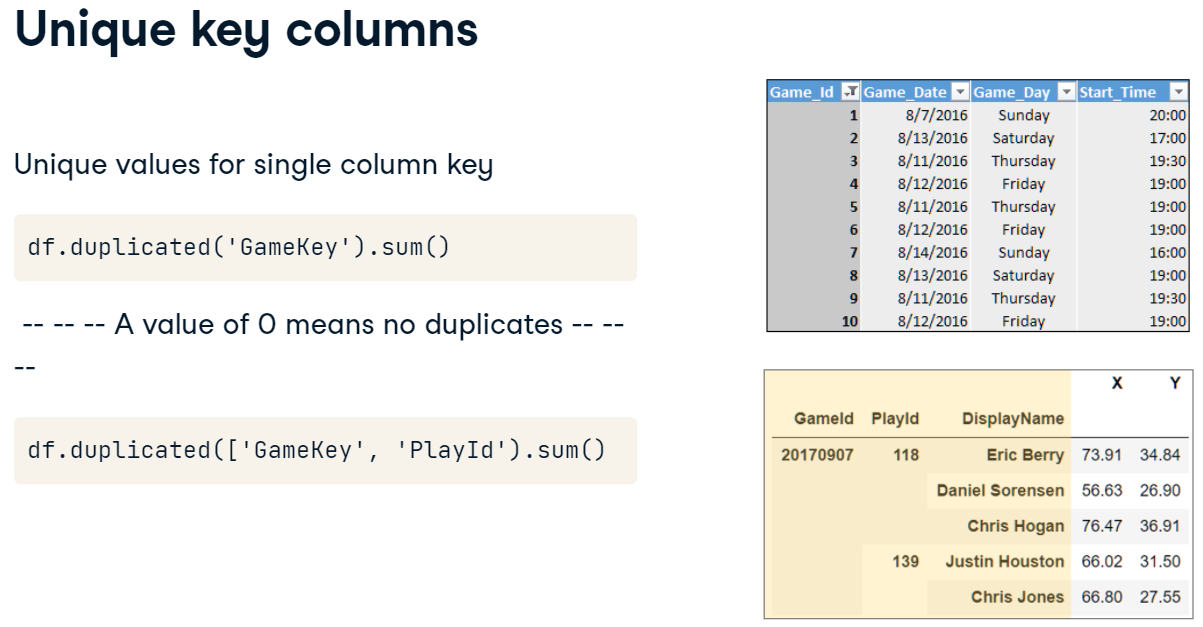

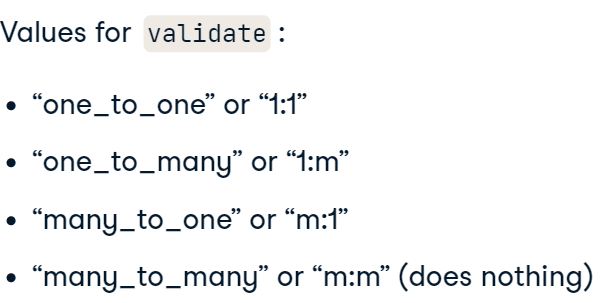


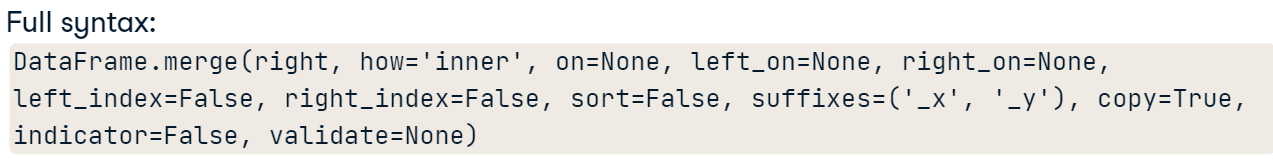

# **Checking for duplicate keys**



,GameKey,HomeTeam,VisitTeam
0,1,Indianapolis Colts,Green Bay Packers
1,2,Los Angeles Rams,Dallas Cowboys
2,3,Baltimore Ravens,Carolina Panthers
3,4,Green Bay Packers,Cleveland Browns
4,5,Chicago Bears,Denver Broncos


Duplicate keys: 0


,GameKey,PlayId,GameClock,Quarter,PlayType,PossessionTeam
0,2,191,12:30,1,Punt,LA
1,2,1132,12:08,2,Punt,LA
2,2,1227,10:01,2,Punt,DAL
3,2,1864,0:21,2,Punt,LA
4,2,2247,10:26,3,Punt,DAL


Duplicate keys: 0
   GameKey          HomeTeam  ... PlayType  PossessionTeam
0        2  Los Angeles Rams  ...     Punt              LA
1        2  Los Angeles Rams  ...     Punt              LA
2        2  Los Angeles Rams  ...     Punt             DAL
3        2  Los Angeles Rams  ...     Punt              LA
4        2  Los Angeles Rams  ...     Punt             DAL
5        2  Los Angeles Rams  ...     Punt              LA
6        2  Los Angeles Rams  ...     Punt              LA
7        2  Los Angeles Rams  ...     Punt             DAL
8        2  Los Angeles Rams  ...     Punt             DAL
9        3  Baltimore Ravens  ...     Punt             BLT

[10 rows x 8 columns]


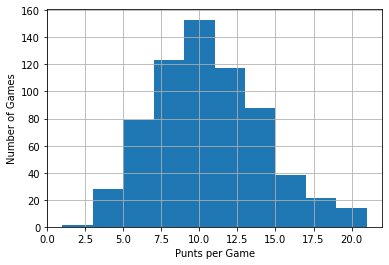

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

punts = pd.read_csv("punts.csv")
punts.drop("Unnamed: 0", axis=1, inplace=True)
game_matchups = pd.read_csv("games.csv")[['GameKey', 'HomeTeam', 'VisitTeam']]

# View first 5 rows of game_matchups and check key columns
display(game_matchups.head())
print('Duplicate keys:', game_matchups.duplicated('GameKey').sum())

# View first 5 rows of punts and check key columns
display(punts.head())
print('Duplicate keys:', punts.duplicated(['GameKey', 'PlayId']).sum())

# Merge data frames 
games_all = game_matchups.merge(punts, how='inner')
print(games_all.head(10))

# Produce counts of games by number of punts
counts = games_all.groupby('GameKey')['PlayId'].size()
counts.hist() 
plt.xlabel("Punts per Game")
plt.ylabel("Number of Games")
plt.show()

# **Joining on Index**

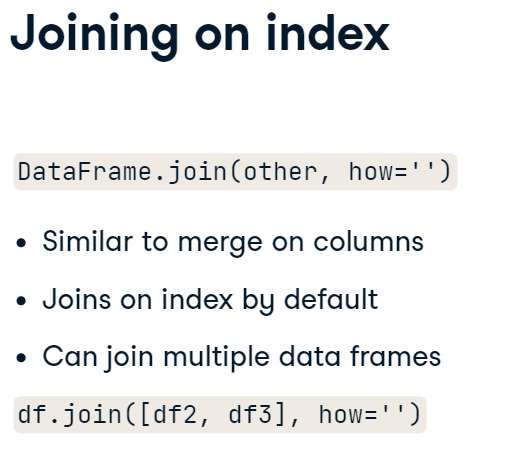

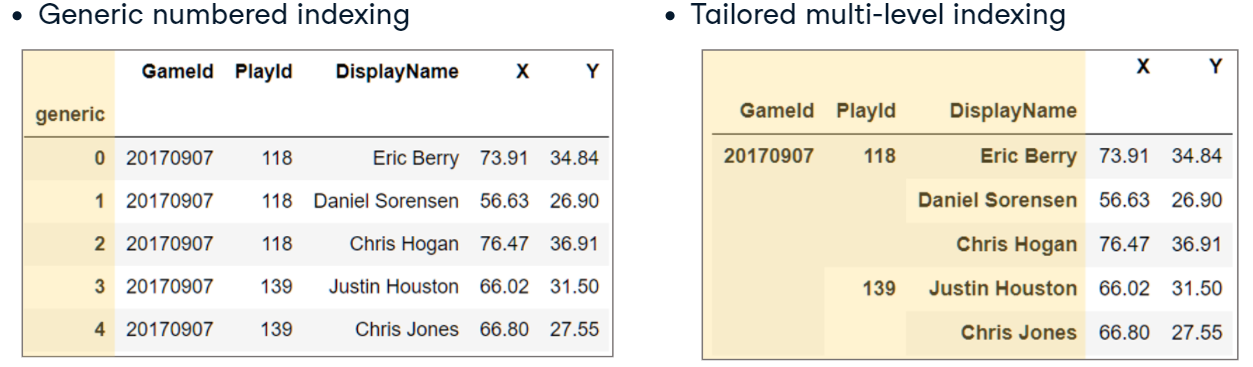

In [ ]:
import pandas as pd

punts = pd.read_csv("punts.csv").set_index(["GameKey",	"PlayId"])
punts.drop("Unnamed: 0", axis=1, inplace=True)
game_matchups = pd.read_csv("games.csv")[['GameKey', 'HomeTeam', 'VisitTeam']].set_index("GameKey")

# View first 10 rows of each data frame
print(game_matchups.head(), '\n', punts.head())

# Join by index and view
games_all = game_matchups.join(punts, how='inner')
print(games_all.head())

# View the number of punts by quarter
number_punts = games_all.groupby("Quarter").size()
print(number_punts)

                   HomeTeam          VisitTeam
GameKey                                       
1        Indianapolis Colts  Green Bay Packers
2          Los Angeles Rams     Dallas Cowboys
3          Baltimore Ravens  Carolina Panthers
4         Green Bay Packers   Cleveland Browns
5             Chicago Bears     Denver Broncos 
                GameClock  Quarter PlayType PossessionTeam
GameKey PlayId                                           
2       191        12:30        1     Punt             LA
        1132       12:08        2     Punt             LA
        1227       10:01        2     Punt            DAL
        1864        0:21        2     Punt             LA
        2247       10:26        3     Punt            DAL
                        HomeTeam       VisitTeam  ... PlayType  PossessionTeam
GameKey PlayId                                    ...                         
2       191     Los Angeles Rams  Dallas Cowboys  ...     Punt              LA
        1132    Los Angele

# **Joining multiple tables**

* Inner join the data frames on index using `games` as the primary data frame.

In [ ]:
import pandas as pd

ngs = pd.read_csv("ngs.csv").set_index(["GameKey",	"PlayId",	"GSISID",	"Time"])
games = pd.read_csv("games.csv").set_index("GameKey")
punts = pd.read_csv("punts.csv").set_index(["GameKey",	"PlayId"])
punts.drop("Unnamed: 0", axis=1, inplace=True)

# List the index of each data frame
print("\n\n",[[n for n in df.index.names] for df in [games, punts, ngs]])

# Inner join the data frames
games_all = games.join([punts, ngs], how="inner")

# View first 10 rows of new frame
print(games_all.head(10))

# Check index for duplicates
print(games_all.index.duplicated().sum())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)




 [['GameKey'], ['GameKey', 'PlayId'], ['GameKey', 'PlayId', 'GSISID', 'Time']]
                                  Season SeasonType  ...      y       o
GameKey PlayId Time       GSISID                     ...               
402     1314   17:55:16.0 30694     2017        Reg  ...  54.22   30.97
               17:55:17.1 32054     2017        Reg  ...  54.20  286.10
                          26158     2017        Reg  ...  54.09  299.60
               17:55:17.2 26995     2017        Reg  ...  54.25  217.80
                          32054     2017        Reg  ...  54.29  288.60
                          26158     2017        Reg  ...  54.22  297.50
               17:55:17.3 26995     2017        Reg  ...  54.29  220.90
               17:55:17.4 27103     2017        Reg  ...  -0.51  205.80
               17:55:17.5 27103     2017        Reg  ...  -0.66  198.80
               17:55:17.6 27103     2017        Reg  ...  -0.83  191.50

[10 rows x 11 columns]
0


# **Mixing indexes and columns**

,name,position,team,salary_millions
player_id,,,,
20338,Charles Sims,RB,Tampa Bay Buccaneers,764000.0
6595,Marwin Evans,S,Green Bay Packers,540000.0
18745,Philip Rivers,QB,Los Angeles Chargers,11000000.0
13960,Chris Manhertz,TE,Carolina Panthers,540000.0
21681,Ryan Switzer,WR,Dallas Cowboys,465000.0


,player_id,name,team,draft_round
0,3897,Barry Church,None,NaN
1,18208,Sheldon Rankins,New Orleans Saints,1.0
2,21284,Grover Stewart,Indianapolis Colts,4.0
3,20013,Tyler Shatley,None,NaN
4,8204,Brandon Graham,Philadelphia Eagles,1.0


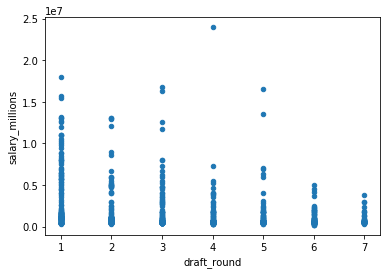

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

current = pd.read_json("players_current.json", orient='split').set_index("player_id")
current["salary_millions"] = current["salary_millions"]
current["salary_millions"] = current["salary_millions"].str.replace(',','').astype(float)
draft = pd.read_json("draft.json", orient='split')

display(current.head())
display(draft.head())

# Merge data frames
players = current.merge(draft, how='outer', left_index=True,  right_on="player_id")

# Create scatter plot
players.plot.scatter('draft_round', 'salary_millions')
plt.show()

# **Suffixes and indicators**

* Merge the data frames on `player_id` just as before and view the result.
* Add suffixes of `'_current'` and `'_draft'` to clarify the origin of columns. View the result.
* Add the `'indicator'` parameter to show the data frame(s) containing each row.
* Finally, sort by player_id using the '`sort`' parameter and view the first 5 rows of the result.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

current = pd.read_json("players_current.json", orient='split').set_index("player_id")
current["salary_millions"] = current["salary_millions"]
current["salary_millions"] = current["salary_millions"].str.replace(',','').astype(float)
draft = pd.read_json("draft.json", orient='split')

# Merge data frames
players = current.merge(draft, how='outer', left_index=True,  right_on='player_id', suffixes=('_current', '_draft'), indicator=True, sort=True)
display(players.head())

,name_current,position,team_current,salary_millions,player_id,name_draft,team_draft,draft_round,_merge
NaN,Ameer Abdullah,RB,Detroit Lions,687830.0,10,NaN,NaN,NaN,left_only
560.0,NaN,NaN,NaN,NaN,21,Oday Aboushi,New York Jets,5.0,right_only
114.0,Sam Acho,OLB,Chicago Bears,775000.0,40,Sam Acho,Arizona Cardinals,4.0,both
1444.0,Kenneth Acker,CB,Kansas City Chiefs,690000.0,42,Kenneth Acker,San Francisco 49ers,6.0,both
1429.0,Andrew Adams,S,New York Giants,540000.0,50,Andrew Adams,None,NaN,both


# **Merge by time**

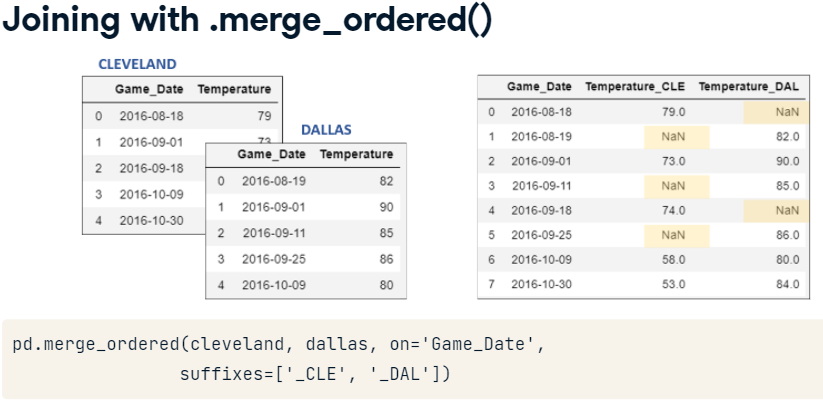

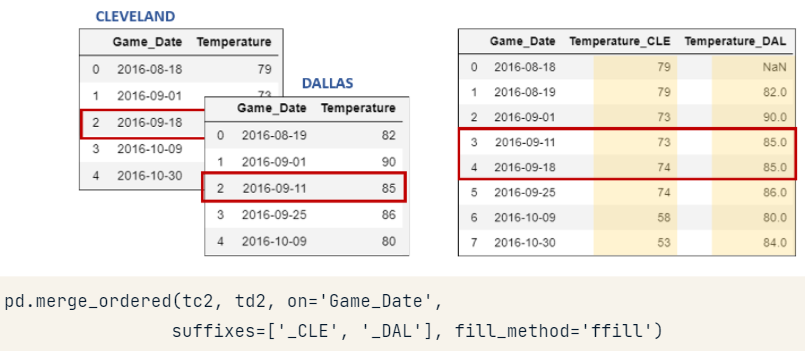




# **Merge when dates do not match exactly**

* `pd.merge_asof()`
* matches the nearest date
* similar to `VLOOKUP(range_lookup=TRUE)`

`pd.merge_asof(left_df, right_df, direction="backward")`

* `direction=`
  * `"backward"` closest earlier date
  * `"forward"`  closest later date
  * `"nearest"`  closest date regardless

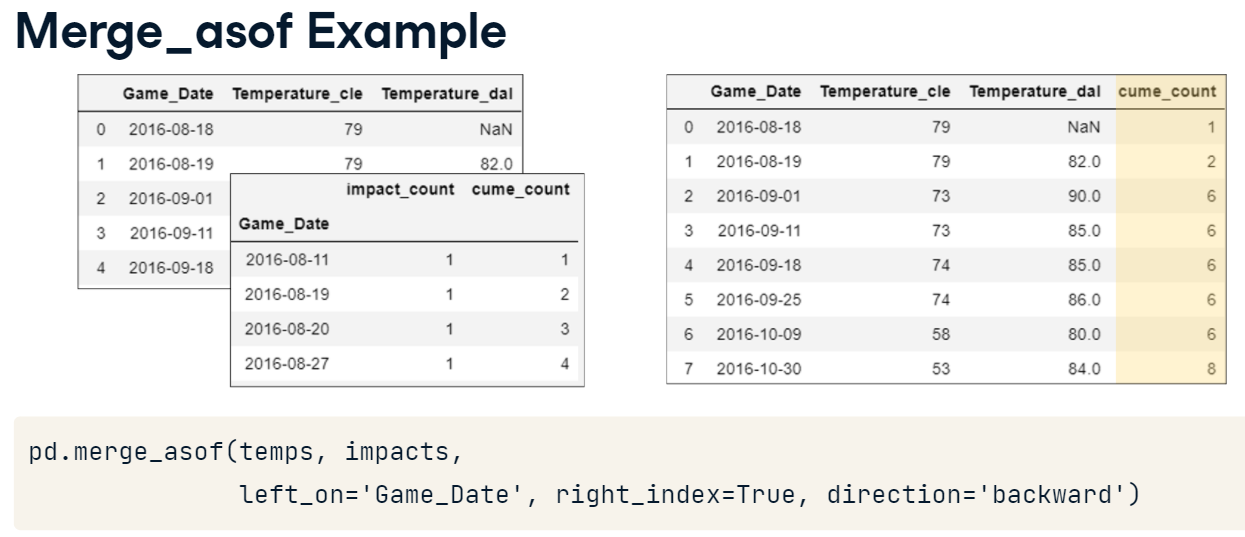


# **Combining time series**

In [12]:
import pandas as pd

temps_cle = pd.read_csv("temps_cle.csv").drop("Unnamed: 0", axis=1)
temps_cle["Game_Date"] = pd.to_datetime(temps_cle["Game_Date"])
temps_dal = pd.read_csv("temps_dal.csv").drop("Unnamed: 0", axis=1)
temps_dal["Game_Date"] = pd.to_datetime(temps_dal["Game_Date"])

# Merge data and view first 10 rows
temps = pd.merge_ordered(temps_cle, temps_dal, on="Game_Date", suffixes=['_CLE', '_DAL'])
display(temps.head())
temps = pd.merge_ordered(temps_cle, temps_dal, on="Game_Date", suffixes=['_CLE', '_DAL'], fill_method="ffill")
display(temps.head())

,Game_Date,Temperature_CLE,Temperature_DAL
0,2016-08-18,79.0,NaN
1,2016-08-19,NaN,82.0
2,2016-09-01,73.0,90.0
3,2016-09-11,NaN,85.0
4,2016-09-18,74.0,NaN


,Game_Date,Temperature_CLE,Temperature_DAL
0,2016-08-18,79,NaN
1,2016-08-19,79,82.0
2,2016-09-01,73,90.0
3,2016-09-11,73,85.0
4,2016-09-18,74,85.0


# **Matching to the nearest time**

* Combine the data to see how many concussions from punts have been recorded as of each game day in temps. 
* Plot a run chart of cumulative concussions as of Cleveland and Dallas game dates. 

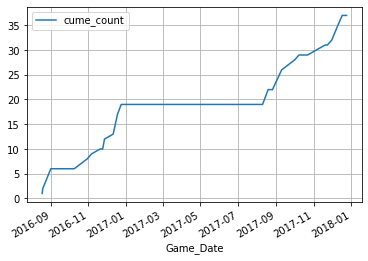

In [25]:
import pandas as pd
import matplotlib.pyplot as plt


temps = pd.read_csv("temps.csv").drop("Unnamed: 0", axis=1)
temps["Game_Date"] = pd.to_datetime(temps["Game_Date"])
impacts = pd.read_csv("impact_time.csv")
impacts["Game_Date"] = pd.to_datetime(impacts["Game_Date"])
impacts.set_index("Game_Date", inplace=True)

# Combine data
temps_and_hits = pd.merge_asof(temps, impacts[['cume_count']], left_on="Game_Date", right_index=True)

# Plot cumulative concussions
temps_and_hits.plot.line('Game_Date', 'cume_count', grid=True)
plt.show()

# **Case study challenge**

In [2]:
import pandas as pd

matchups_2017 = pd.read_csv("matchups_2017.csv").drop("Unnamed: 0", axis=1)
matchups_2018 = pd.read_csv("matchups_2018.csv").drop("Unnamed: 0", axis=1)
conditions_2017 = pd.read_csv("conditions_2017.csv").drop("Unnamed: 0", axis=1)
conditions_2017 = pd.read_csv("conditions_2018.csv").drop("Unnamed: 0", axis=1)

# Combine match-up data
matchups = pd.concat([matchups_2017, matchups_2018])

# Combine game conditions data
conditions = pd.concat([conditions_2017, conditions_2018])

# Combine game-level data frame
games = matchups.merge(conditions, how="inner", on="GameId")

In [3]:
matchups_2017.head()

,GameId,HomeTeamAbbr,VisitorTeamAbbr,Week
0,2017090700,NE,KC,1
1,2017091000,BUF,NYJ,1
2,2017091001,CHI,ATL,1
3,2017091002,CIN,BAL,1
4,2017091003,CLE,PIT,1
